### Imports

In [15]:
%load_ext autoreload
%autoreload 2

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from data_management import load_iris_data, sample_data
from plotting import plot3d_iris_dataset, plot_target_classes
from model_evaluation import  evaluate_classifiers, evaluation_pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Loading and Visualization

In [16]:
feature_matrix = load_iris_data()

plot3d_iris_dataset(feature_matrix, "Iris dataset")

### Random Sampling

In [17]:
train_array, test_array = sample_data(feature_matrix, "uniform", 0.6)

val_array, test_array = sample_data(test_array, "uniform", 0.5)

X_train = train_array[:, :-1]
y_train = train_array[:, -1]

X_val = val_array[:, :-1]
y_val = val_array[:, -1]

X_test = test_array[:, :-1]
y_test = test_array[:, -1]

### Distribution Visualization

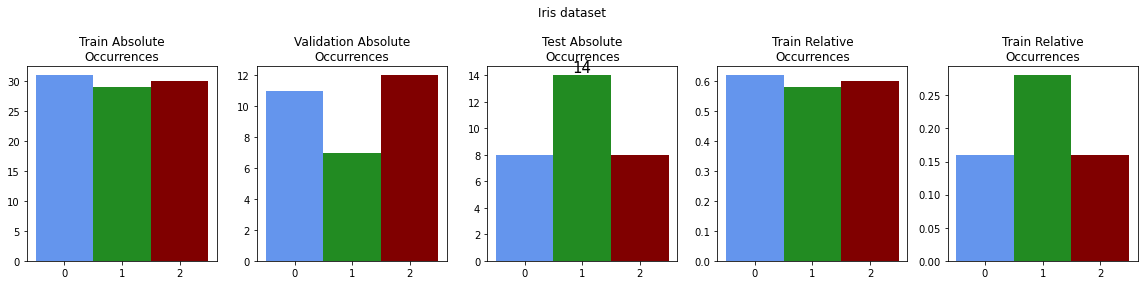

In [18]:
plot_target_classes(y_train, y_val, y_test, "Iris dataset")

In [19]:
plot3d_iris_dataset(train_array, "Train dataset")

### Model Benchmarking

In [20]:
gen_error = 0.01
train_error = 0.01

classifiers_errors = evaluation_pipeline(feature_matrix, 'decision_tree', gen_error, train_error, depth=3)

Required samples: 100017, available samples: 150.
Not enough samples available, will return standard 60%.
90 of the data are used for training.
30 of the data are used for validation.
30 of the data are used for testing.
decision_tree
Label One: train error: 0.125, val error: 0.0, test error: 0.19999999999999996
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0


In [13]:
classifiers_dict = {
    'decision_tree': DecisionTreeClassifier(max_depth=3),
    'svm_linear': SVC(kernel='linear', C=1.0),
    'svm_poly': SVC(kernel='poly', C=1.0, degree=30),
    'svm_rbf': SVC(kernel='rbf', C=1.0),
    'logistic_regression': LogisticRegression(solver='lbfgs', C=1.0)
}

classifiers_errors = evaluate_classifiers(classifiers_dict, X_train, y_train, X_val, y_val, X_test, y_test)

decision_tree
Label One: train error: 0.03448275862068961, val error: 0.09090909090909094, test error: 0.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
svm_linear
Label One: train error: 0.0, val error: 0.09090909090909094, test error: 0.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
svm_poly
Label One: train error: 0.0, val error: 0.09090909090909094, test error: 0.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
svm_rbf
Label One: train error: 0.0, val error: 0.09090909090909094, test error: 0.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
logistic_regression
Label One: train error: 0.03448275862068961, val error: 0.09090909090909094, test error: 0.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
